In [ ]:
#pip install -U Seaborn

# Multiple Linear Regression Case Study

**PROBLEM STATEMENT** 
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

**Read the data**

In [3]:
df = pd.read_csv('Cars.csv')

**Check the Head**

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


**Get the info**

**Get the Summary Statistics**

**Check for Null Values**

**% Null values**

In [7]:
df.isna().sum()*100/df.isna().sum().sum()

Name                  0.000000
Location              0.208808
Year                  0.037965
Kilometers_Driven     0.151860
Fuel_Type             0.000000
Transmission          0.512528
Owner_Type            0.284738
Mileage               0.037965
Engine                0.322703
Power                 0.607441
Colour                0.208808
Seats                 0.094913
No. of Doors          0.018983
New_Price            97.513288
Price                 0.000000
dtype: float64

**Since New_Price has over 97% Null values, we would drop this column for now**

In [8]:
df = df.drop('New_Price', axis=1)

In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace=True)

**Check for Object Data Types**

See if there is any Numerical column

In [12]:
df.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


- It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype

In [13]:
df['Mileage'] = df['Mileage'].str.replace(',', '').str.replace('kmpl','').str.replace('km/kg', '').astype('float')

In [14]:
df['Engine'] = df['Engine'].str.replace(',', '').str.replace('CC','').astype('float')

**Create a new column 'Brand' which has the brand name of the Cars**

**Create a new column 'Model' which has the Model name of the Cars**

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


**Bin the cars as per average Price and Brand into 3 categories**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [84]:
#Binning the Car Companies based on avg prices of each car Company.



In [ ]:
import pandas as pd
import numpy as np

df_nums = pd.DataFrame({'num': np.random.randint(1, 20, 10)})
print(df_nums)

df_nums['nums_labels'] = pd.cut(x=df_nums['num'], bins=[1, 10, 20], labels=['Lows', 'Highs'], right=True)

print(df_nums)

print(df_nums['nums_labels'].unique())

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

**Check for Outliers**

In [ ]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

**Seems like Kilometers_Driven, Power, Engine have many outliers**

**Outliers Treatment**

In [95]:
Q1 = cars.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [96]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131603.50,131603.50,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

Shape After Outliers Treatment (5961, 18)


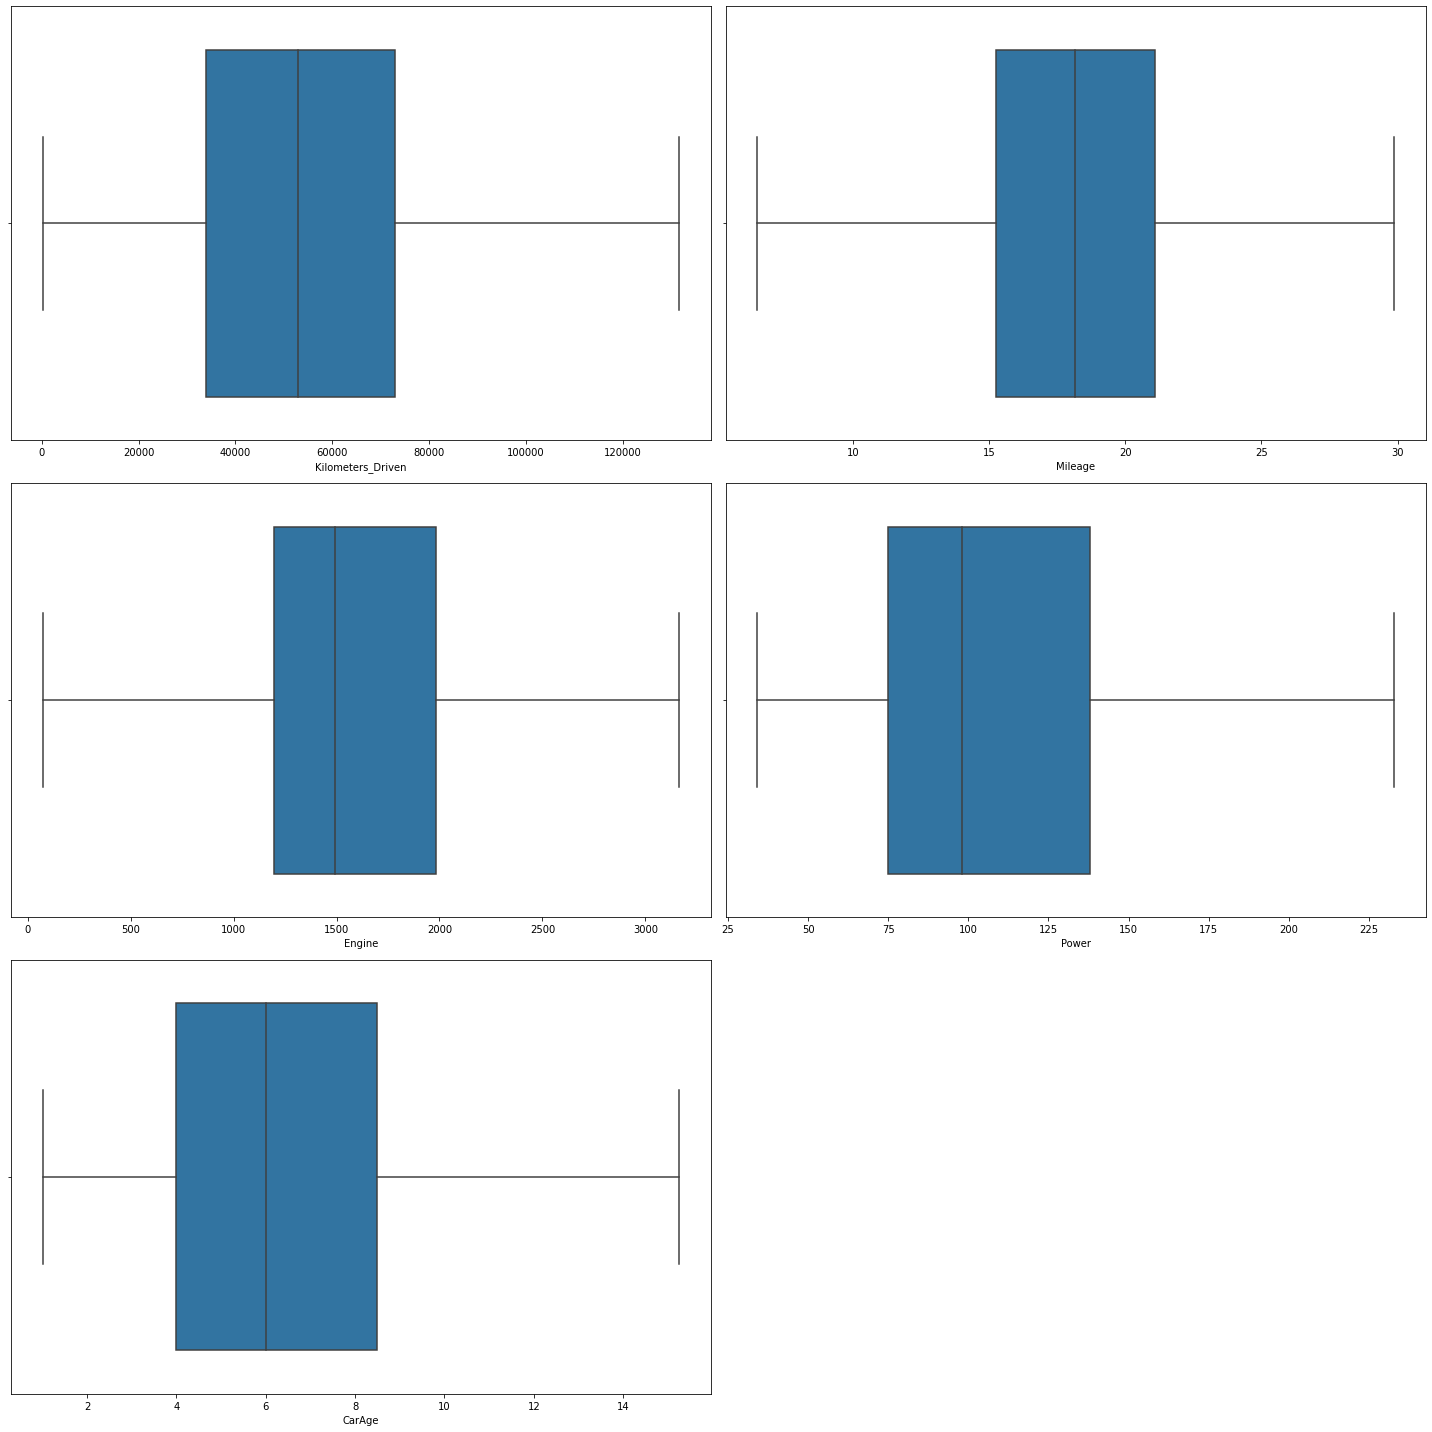

In [97]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [105]:
#you can use any other method as well
from sklearn.impute import SimpleImputer


**Impute the Object values using Mode**

In [107]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects].iloc[:,:])

**There are no Null values now**

**Encode the Data**

There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [117]:
#cars.Cars_Category

In [111]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes
cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

**FYI:Decision Tree algorithm (in python's sk-learn) will split int8/category at decimal points (0.5, 1.5, etc.) which will not make any sense, so think what to do here??**

**example: Cars_Category column will be split into 1.5 or Places will be split into 6.5. You can view the DT image in later sections**

**Split the Data**

In [115]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,16,161,0,8.0
1,108,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,17,25,0,2.0
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,16,201,0,7.0
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,90,0,6.0
4,195,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,27,97,1,9.0


In [119]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier


**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [120]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    if i != annr:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    elif i==annr:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          5.836795   6.130392        0.725453    0.716731
Decision Tree Regressor    0.018962   4.703091        0.999997    0.833280
Random Forest Regressor    1.275248   4.231716        0.986894    0.865024
ANN Regressor              2.083632   4.199274        0.965013    0.867086


In [145]:
regression_model.intercept_

7.548071604440086

In [146]:
x_train.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats',
       'No. of Doors', 'Brand', 'Model', 'Cars_Category', 'CarAge'],
      dtype='object')

In [138]:
regression_model.coef_

array([-2.10961802e-01, -3.01316180e-05, -2.83869744e-01, -4.89200214e-01,
       -6.29380143e-02, -1.08096345e-01,  4.07713924e-03,  5.60877306e-02,
        4.93217362e-02, -2.29956517e+00,  2.43005915e+00, -2.15813143e-02,
        1.06374965e-02,  5.73580105e+00, -9.87982579e-01])

**Looks Like ANN, DT, and RF are over-fitting, Let's Grid Search to get the best parameters**

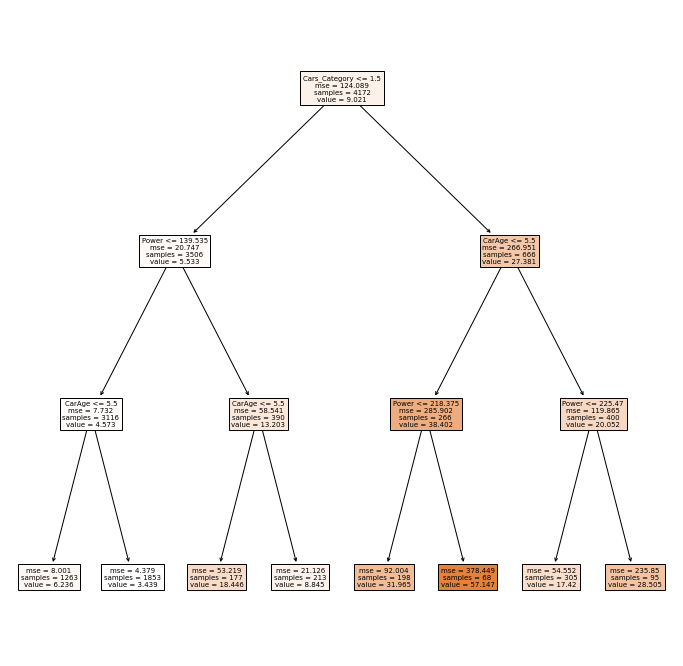

In [121]:
dtr=tree.DecisionTreeRegressor(max_depth=3) #Just for viewing
plt.figure(figsize=(12,12))
tree.plot_tree(dtr.fit(x_train,y_train), filled=True,feature_names=x_train.columns)
plt.show() #too small with max_depth=3

In [122]:
#save dot file to view the decision tree on webgraphviz
dtr=tree.DecisionTreeRegressor()
dtr.fit(x_train,y_train)
tree_unreg = open('tree_unreg.dot','w')
dot_data = tree.export_graphviz(dtr, out_file= tree_unreg , feature_names =x_train.columns)
tree_unreg.close()

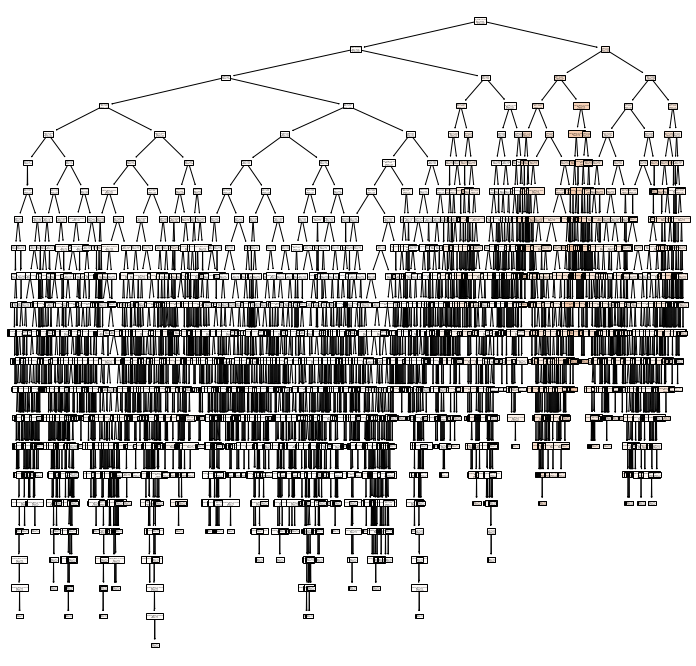

In [123]:
#plot decision here
plt.figure(figsize=(12,12))
tree.plot_tree(dtr.fit(x_train,y_train), filled=True,feature_names=x_train.columns)
plt.savefig('tree_unreg.svg', format='svg', dpi=3600) #you can open the saved image using google chrome

**Grid Search on Decision Tree**

In [124]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 35}


Let us take Max_depth as 10, min_samples_leaf as 3 and Min_sample_split as 35. You are welcome to try other values as well.

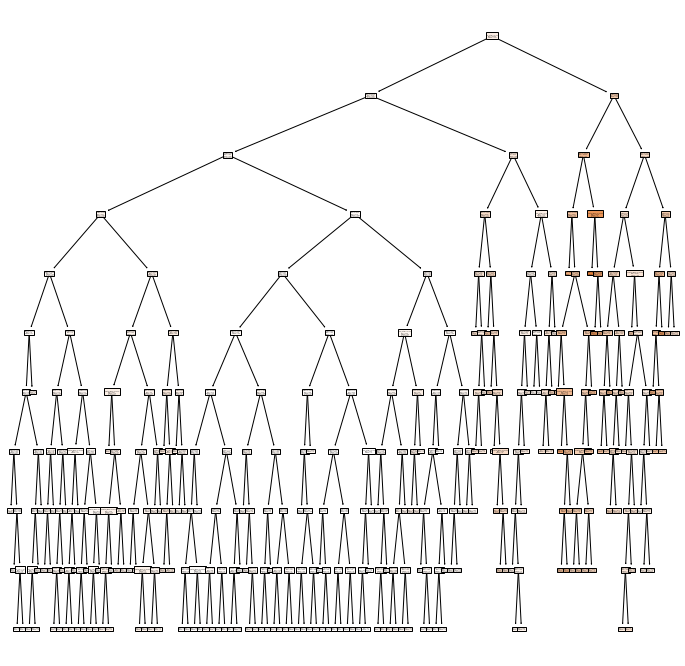

In [125]:
dtr=tree.DecisionTreeRegressor(max_depth=10,min_samples_split=35,min_samples_leaf=3,random_state=123)
plt.figure(figsize=(12,12))
tree.plot_tree(dtr.fit(x_train,y_train), filled=True,feature_names=x_train.columns)
plt.savefig('tree_reg.svg', format='svg', dpi=2400) #you can open the saved image using google chrome

**Using Grid Search for Random Forest**

In [126]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [127]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [128]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [129]:
best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

**Using Grid Search for ANN**

In [130]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [131]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=123, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation

In [132]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


In [133]:
best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}

**Now, Let's compare the models again**

In [134]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=35,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:
    if i != annr:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    elif i==annr:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          5.836795   6.130392        0.725453    0.716731
Decision Tree Regressor    3.343651   4.668964        0.909903    0.835690
Random Forest Regressor    3.311986   4.336053        0.911602    0.858287
ANN Regressor              2.083632   4.199274        0.965013    0.867086


> **So what do you think which algo performed well here?**

ANN or Random Forest or Decision Tree or Linear Regression?

> **Which performance metric will you prefer here?**

RMSE or R Squared?


**Get the Feature Importances using Decision Tree and RF**

In [135]:
rfrfeat=rfr.feature_importances_
dtrfeat=dtr.feature_importances_
print(pd.DataFrame({'Feature_Importance_RF': rfrfeat,'Feature_Importance_DT':dtrfeat},
                   index=x_test.columns).sort_values(by=['Feature_Importance_DT','Feature_Importance_RF'],ascending=False))

                   Feature_Importance_RF  Feature_Importance_DT
Cars_Category                   0.289576               0.573371
CarAge                          0.142010               0.191297
Power                           0.255962               0.164837
Engine                          0.130464               0.020178
Kilometers_Driven               0.050840               0.016089
Mileage                         0.017430               0.014386
Model                           0.012856               0.006874
Seats                           0.011594               0.006103
Brand                           0.021581               0.003877
Location                        0.003878               0.002634
Fuel_Type                       0.004904               0.000199
Transmission                    0.053406               0.000118
Colour                          0.000321               0.000036
No. of Doors                    0.003494               0.000000
Owner_Type                      0.001684

> **Which Feature seems to be the most important one?**

- Cars_Category

> **What all features have no importance in Decision Tree but does have some importance in the Random Forest?**

- Owner_Type, No. of Doors


**Now, Go on explore the dataset and do more feature engineering, EDA and find out the best way to get better R Squared and lower RMSE**

                                               Happy Learning